# 1) Delivery_time -> Predict delivery time using sorting time 



In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from numpy.polynomial.polynomial import polyfit
from sklearn.linear_model import LinearRegression

In [31]:
delivery_time=pd.read_csv("C:\\Users\\user\\EXCELR\\Assignments\\Simple Linear Regression\\delivery_time.csv")

In [32]:
delivery_time.head(25)

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [72]:
delivery_time.shape

(21, 2)

In [73]:
delivery_time.isna().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

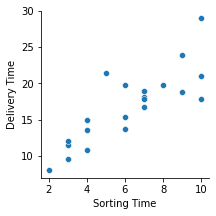

In [33]:
import seaborn as sns
sns.pairplot(delivery_time,x_vars="Sorting Time",y_vars="Delivery Time",size=3,kind='scatter')
plt.show()

<AxesSubplot:>

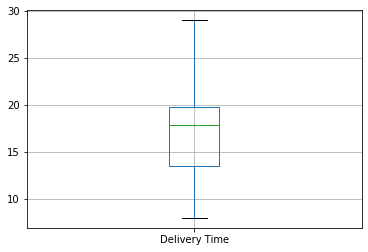

In [70]:
delivery_time.boxplot(column=['Delivery Time'])

<AxesSubplot:>

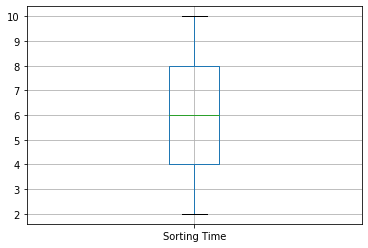

In [71]:
delivery_time.boxplot(column=['Sorting Time'])

<AxesSubplot:>

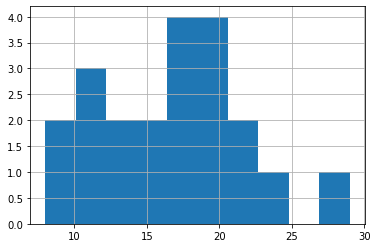

In [74]:
delivery_time['Delivery Time'].hist()

<AxesSubplot:>

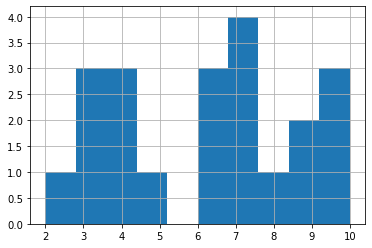

In [75]:
delivery_time['Sorting Time'].hist()

In [34]:
X=delivery_time['Sorting Time']
Y=delivery_time['Delivery Time']

In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test, Y_train, Y_test= train_test_split(X,Y, train_size=0.70, test_size=0.30, random_state=100)

In [36]:
print(X_train.shape)
print(X_train.shape)
print(Y_train.shape)
print(Y_test.shape)

(14,)
(14,)
(14,)
(7,)


In [37]:
import statsmodels.api as sm

In [38]:
X_train_sm=sm.add_constant(X_train)
lr1=sm.OLS(Y_train,X_train_sm).fit()
lr1.params

const           6.319649
Sorting Time    1.679945
dtype: float64

In [39]:
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:          Delivery Time   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     25.11
Date:                Wed, 09 Mar 2022   Prob (F-statistic):           0.000304
Time:                        07:57:31   Log-Likelihood:                -33.931
No. Observations:                  14   AIC:                             71.86
Df Residuals:                      12   BIC:                             73.14
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            6.3196      2.340      2.701   

In [43]:
X_test_sm=sm.add_constant(X_test)
Y_pred=lr1.predict(X_test_sm)
Y_pred.head(10)

18     9.679539
20    14.719373
11    13.039428
19    18.079262
13    11.359483
6     18.079262
0     23.119096
dtype: float64

# Log Transformation of X

In [46]:
X_log = np.log(delivery_time['Sorting Time'])

In [47]:
import statsmodels.api as sm
model = sm.OLS(Y, X_log).fit()
predictions = model.predict(X_log)


In [48]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Delivery Time   R-squared (uncentered):                   0.975
Model:                            OLS   Adj. R-squared (uncentered):              0.974
Method:                 Least Squares   F-statistic:                              791.0
Date:                Wed, 09 Mar 2022   Prob (F-statistic):                    1.48e-17
Time:                        07:58:47   Log-Likelihood:                         -51.035
No. Observations:                  21   AIC:                                      104.1
Df Residuals:                      20   BIC:                                      105.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Sorting Time     9.6706      0.344     28.124      0.000       8.953      10.388
==============================================================================
Omnibus:                        3.656   Durbin-Watson:                   1.453
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.164
Skew:                           0.772   Prob(JB):                        0.339
Kurtosis:                       3.298   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# LOg transformation of Y

In [51]:
Y_log = np.log(delivery_time['Delivery Time'])
model = sm.OLS(Y_log, X).fit()
predictions = model.predict(X)

In [52]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Delivery Time   R-squared (uncentered):                   0.917
Model:                            OLS   Adj. R-squared (uncentered):              0.912
Method:                 Least Squares   F-statistic:                              219.7
Date:                Wed, 09 Mar 2022   Prob (F-statistic):                    3.00e-12
Time:                        08:29:37   Log-Likelihood:                         -25.284
No. Observations:                  21   AIC:                                      52.57
Df Residuals:                      20   BIC:                                      53.61
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Sorting Time     0.4008      0.027     14.821      0.000       0.344       0.457
==============================================================================
Omnibus:                        2.572   Durbin-Watson:                   1.446
Prob(Omnibus):                  0.276   Jarque-Bera (JB):                1.346
Skew:                          -0.275   Prob(JB):                        0.510
Kurtosis:                       1.889   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Log trasnformation of X & Y

In [53]:
model = sm.OLS(Y_log, X_log).fit()
predictions = model.predict(X_log)

In [55]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Delivery Time   R-squared (uncentered):                   0.972
Model:                            OLS   Adj. R-squared (uncentered):              0.970
Method:                 Least Squares   F-statistic:                              688.7
Date:                Wed, 09 Mar 2022   Prob (F-statistic):                    5.72e-17
Time:                        08:31:23   Log-Likelihood:                         -13.899
No. Observations:                  21   AIC:                                      29.80
Df Residuals:                      20   BIC:                                      30.84
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Sorting Time     1.5396      0.059     26.244      0.000       1.417       1.662
==============================================================================
Omnibus:                        1.636   Durbin-Watson:                   1.727
Prob(Omnibus):                  0.441   Jarque-Bera (JB):                1.137
Skew:                           0.304   Prob(JB):                        0.566
Kurtosis:                       2.035   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Square Root Transformation of Y

In [63]:
Y_sqrt = np.sqrt(delivery_time['Delivery Time'])

In [64]:
model=sm.OLS(Y_sqrt,X).fit()
predictions=model.predict(X)

In [65]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Delivery Time   R-squared (uncentered):                   0.930
Model:                            OLS   Adj. R-squared (uncentered):              0.927
Method:                 Least Squares   F-statistic:                              266.0
Date:                Wed, 09 Mar 2022   Prob (F-statistic):                    5.09e-13
Time:                        08:40:43   Log-Likelihood:                         -31.484
No. Observations:                  21   AIC:                                      64.97
Df Residuals:                      20   BIC:                                      66.01
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Sorting Time     0.5926      0.036     16.309      0.000       0.517       0.668
==============================================================================
Omnibus:                        1.452   Durbin-Watson:                   1.434
Prob(Omnibus):                  0.484   Jarque-Bera (JB):                1.105
Skew:                          -0.328   Prob(JB):                        0.575
Kurtosis:                       2.087   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Square Root Transformation of X

In [66]:
X_sqrt = np.sqrt(delivery_time['Sorting Time'])

In [ ]:
model=sm.OLS(Y,X_sqrt).fit()
predictions=model.predict(Y)

In [67]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Delivery Time   R-squared (uncentered):                   0.930
Model:                            OLS   Adj. R-squared (uncentered):              0.927
Method:                 Least Squares   F-statistic:                              266.0
Date:                Wed, 09 Mar 2022   Prob (F-statistic):                    5.09e-13
Time:                        08:42:22   Log-Likelihood:                         -31.484
No. Observations:                  21   AIC:                                      64.97
Df Residuals:                      20   BIC:                                      66.01
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Sorting Time     0.5926      0.036     16.309      0.000       0.517       0.668
==============================================================================
Omnibus:                        1.452   Durbin-Watson:                   1.434
Prob(Omnibus):                  0.484   Jarque-Bera (JB):                1.105
Skew:                          -0.328   Prob(JB):                        0.575
Kurtosis:                       2.087   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Square Root Transformation of X & Y

In [68]:
model=sm.OLS(Y_sqrt,X_sqrt).fit()
predictions=model.predict(X_sqrt)

In [69]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Delivery Time   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              1542.
Date:                Wed, 09 Mar 2022   Prob (F-statistic):                    2.10e-20
Time:                        08:44:28   Log-Likelihood:                         -13.658
No. Observations:                  21   AIC:                                      29.32
Df Residuals:                      20   BIC:                                      30.36
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Sorting Time     1.6364      0.042     39.267      0.000       1.549       1.723
==============================================================================
Omnibus:                        0.176   Durbin-Watson:                   1.461
Prob(Omnibus):                  0.916   Jarque-Bera (JB):                0.231
Skew:                          -0.179   Prob(JB):                        0.891
Kurtosis:                       2.632   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Consclusion

Last Model has best R square value

a)  p-value < 0.01
Thus the model is accepted
b)  Adj. R-sqared == 0.987
Thus the model explains 98.7% of the variance in dependent variable

# 2) Salary_hike -> Build a prediction model for Salary_hike

In [90]:
salary_hike=pd.read_csv("C:\\Users\\user\\EXCELR\\Assignments\\Simple Linear Regression\\Salary_Data.csv")

In [91]:
salary_hike.head(10)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [92]:
salary_hike.shape

(30, 2)

In [93]:
salary_hike.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

<AxesSubplot:>

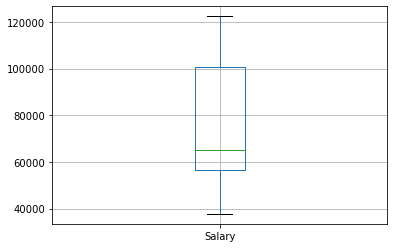

In [94]:
salary_hike.boxplot(column=['Salary'])


<AxesSubplot:>

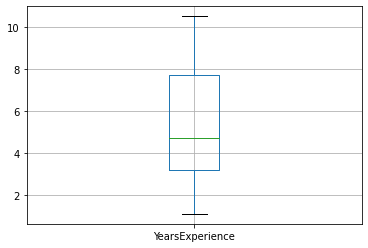

In [95]:
salary_hike.boxplot(column=['YearsExperience'])

array([[<AxesSubplot:title={'center':'YearsExperience'}>]], dtype=object)

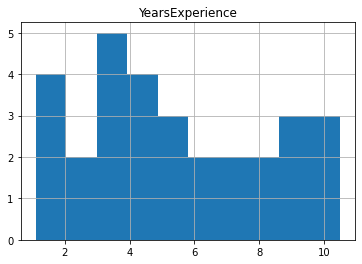

In [96]:
salary_hike.hist(column=['YearsExperience'])

array([[<AxesSubplot:title={'center':'Salary'}>]], dtype=object)

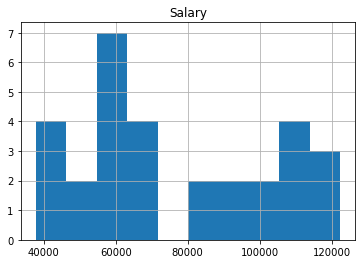

In [97]:
salary_hike.hist(column=['Salary'])

<function matplotlib.pyplot.show(close=None, block=None)>

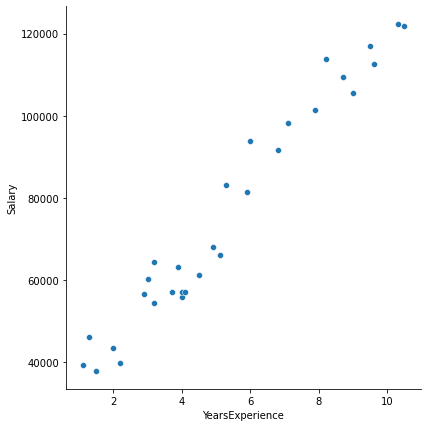

In [98]:
sns.pairplot(salary_hike, x_vars='YearsExperience', y_vars='Salary', size=6, kind='scatter')
plt.show

In [99]:
X=salary_hike['YearsExperience']
Y=salary_hike['Salary']

In [100]:

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.7,test_size=0.3)

In [101]:
print( X_train.shape )
print( X_test.shape )
print( Y_train.shape )
print( Y_test.shape )

(21,)
(9,)
(21,)
(9,)


In [102]:
X_train_sm=sm.add_constant(X_train)

In [103]:
lr1=sm.OLS(Y_train,X_train_sm).fit()
lr1.params

const              27488.605891
YearsExperience     9179.887233
dtype: float64

In [104]:
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     366.9
Date:                Wed, 09 Mar 2022   Prob (F-statistic):           6.98e-14
Time:                        09:02:13   Log-Likelihood:                -211.15
No. Observations:                  21   AIC:                             426.3
Df Residuals:                      19   BIC:                             428.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.749e+04   3063.256      8.974      0.000    2.11e+04    3.39e+04
YearsExperience  9179.8872    479.278     19.154      0.000    8176.747    1.02e+04
==============================================================================
Omnibus:                        1.815   Durbin-Watson:                   1.656
Prob(Omnibus):                  0.404   Jarque-Bera (JB):                1.038
Skew:                           0.140   Prob(JB):                        0.595
Kurtosis:                       1.948   Cond. No.                         15.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Log Transformation of Y


In [117]:
Y_log= np.log(salary_hike['Salary'])
model= sm.OLS(Y_log, X).fit()   
predictions = model.predict(X)

In [118]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   0.809
Model:                            OLS   Adj. R-squared (uncentered):              0.802
Method:                 Least Squares   F-statistic:                              122.8
Date:                Wed, 09 Mar 2022   Prob (F-statistic):                    6.09e-12
Time:                        09:09:04   Log-Likelihood:                         -90.160
No. Observations:                  30   AIC:                                      182.3
Df Residuals:                      29   BIC:                                      183.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
YearsExperience     1.6755      0.151     11.083      0.000       1.366       1.985
==============================================================================
Omnibus:                        3.609   Durbin-Watson:                   0.016
Prob(Omnibus):                  0.165   Jarque-Bera (JB):                2.045
Skew:                          -0.389   Prob(JB):                        0.360
Kurtosis:                       1.985   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Log transformation of X

In [119]:
X_log= np.log(salary_hike['YearsExperience'])
model= sm.OLS(Y, X_log).fit()   
predictions = model.predict(Y)


In [121]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   0.979
Model:                            OLS   Adj. R-squared (uncentered):              0.978
Method:                 Least Squares   F-statistic:                              1338.
Date:                Wed, 09 Mar 2022   Prob (F-statistic):                    8.06e-26
Time:                        09:10:35   Log-Likelihood:                         -323.70
No. Observations:                  30   AIC:                                      649.4
Df Residuals:                      29   BIC:                                      650.8
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
YearsExperience  4.909e+04   1341.796     36.583      0.000    4.63e+04    5.18e+04
==============================================================================
Omnibus:                       10.249   Durbin-Watson:                   0.421
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                8.950
Skew:                           1.106   Prob(JB):                       0.0114
Kurtosis:                       4.507   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Log transformation of X and Y 

In [122]:
model = sm.OLS(Y_log, X_log).fit()
predictions = model.predict(X_log)

In [123]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   0.878
Model:                            OLS   Adj. R-squared (uncentered):              0.874
Method:                 Least Squares   F-statistic:                              209.1
Date:                Wed, 09 Mar 2022   Prob (F-statistic):                    8.60e-15
Time:                        09:11:27   Log-Likelihood:                         -83.410
No. Observations:                  30   AIC:                                      168.8
Df Residuals:                      29   BIC:                                      170.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
YearsExperience     6.4461      0.446     14.461      0.000       5.534       7.358
==============================================================================
Omnibus:                        2.550   Durbin-Watson:                   0.026
Prob(Omnibus):                  0.279   Jarque-Bera (JB):                2.163
Skew:                           0.640   Prob(JB):                        0.339
Kurtosis:                       2.697   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Square Root Transformation of X

In [124]:
X_sqrt = np.sqrt(salary_hike['YearsExperience'])
model = sm.OLS(Y, X_sqrt).fit()
predictions = model.predict(X_sqrt)

In [125]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   0.989
Model:                            OLS   Adj. R-squared (uncentered):              0.989
Method:                 Least Squares   F-statistic:                              2697.
Date:                Wed, 09 Mar 2022   Prob (F-statistic):                    3.62e-30
Time:                        09:12:38   Log-Likelihood:                         -313.35
No. Observations:                  30   AIC:                                      628.7
Df Residuals:                      29   BIC:                                      630.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
YearsExperience   3.48e+04    670.056     51.932      0.000    3.34e+04    3.62e+04
==============================================================================
Omnibus:                        5.654   Durbin-Watson:                   0.734
Prob(Omnibus):                  0.059   Jarque-Bera (JB):                1.849
Skew:                          -0.040   Prob(JB):                        0.397
Kurtosis:                       1.786   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Square Root Transformation of Y

In [126]:
Y_sqrt = np.sqrt(salary_hike['Salary'])
model = sm.OLS(Y_sqrt, X).fit()
predictions = model.predict(Y_sqrt)

In [128]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   0.906
Model:                            OLS   Adj. R-squared (uncentered):              0.902
Method:                 Least Squares   F-statistic:                              278.1
Date:                Wed, 09 Mar 2022   Prob (F-statistic):                    2.12e-16
Time:                        09:13:18   Log-Likelihood:                         -175.75
No. Observations:                  30   AIC:                                      353.5
Df Residuals:                      29   BIC:                                      354.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
YearsExperience    43.7142      2.621     16.676      0.000      38.353      49.076
==============================================================================
Omnibus:                        2.437   Durbin-Watson:                   0.046
Prob(Omnibus):                  0.296   Jarque-Bera (JB):                1.859
Skew:                          -0.445   Prob(JB):                        0.395
Kurtosis:                       2.167   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Square Root Transformation of X and Y

In [129]:
model = sm.OLS(X_sqrt, Y_sqrt).fit()
predictions = model.predict(X_sqrt)

In [130]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        YearsExperience   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              2338.
Date:                Wed, 09 Mar 2022   Prob (F-statistic):                    2.81e-29
Time:                        09:15:26   Log-Likelihood:                         -1.5909
No. Observations:                  30   AIC:                                      5.182
Df Residuals:                      29   BIC:                                      6.583
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Salary         0.0083      0.000     48.352      0.000       0.008       0.009
==============================================================================
Omnibus:                        2.613   Durbin-Watson:                   0.230
Prob(Omnibus):                  0.271   Jarque-Bera (JB):                2.048
Skew:                          -0.636   Prob(JB):                        0.359
Kurtosis:                       2.856   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Consclusion

We will use Model  Sq Root Transformation of X ,it has the best R square value

1 - p-value < 0.01
Thus the model is accepted

2 - Adj. R-sqared == 0.989
Thus the model explains 98.9% of the variance in dependent variable